#**Importing Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read dataset
df = pd.read_csv('netflix_titles.csv')
print(df)

     show_id  ...                                        description
0         s1  ...  In a future where the elite inhabit an island ...
1         s2  ...  After a devastating earthquake hits Mexico Cit...
2         s3  ...  When an army recruit is found dead, his fellow...
3         s4  ...  In a postapocalyptic world, rag-doll robots hi...
4         s5  ...  A brilliant group of students become card-coun...
...      ...  ...                                                ...
7782   s7783  ...  When Lebanon's Civil War deprives Zozo of his ...
7783   s7784  ...  A scrappy but poor boy worms his way into a ty...
7784   s7785  ...  In this documentary, South African rapper Nast...
7785   s7786  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786   s7787  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]


#**Data Cleaning**

In [3]:
df.shape

(7787, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df_copy = df.copy()
df_copy.drop(['director', 'cast', 'date_added'], axis=1, inplace=True) #Menghapus kolom
df_copy

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [9]:
df_copy.isnull().sum()

show_id           0
type              0
title             0
country         507
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

#**Data Exploration & Visualzation**

##Eksplorasi tipe tayangan yang ada di Netflix


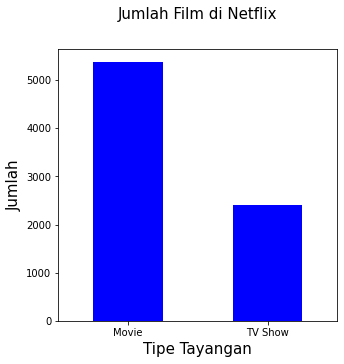

In [21]:
plt.figure(1, figsize=(5,5))

data_year = df.groupby(['type'])['title'].count().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Jumlah Film di Netflix', loc='center', pad=30, fontsize=15)
plt.xlabel('Tipe Tayangan', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

##Tahun Rilis Konten di Netflix

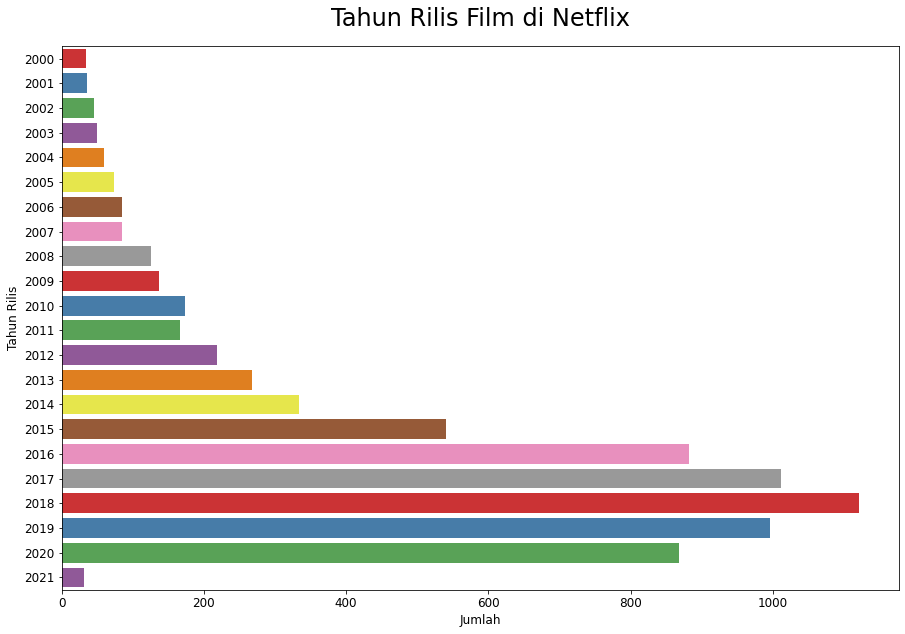

In [20]:
data_year = df[df['release_year']>=2000]
plt.figure(1, figsize=(15,10))

sns.countplot(y='release_year', data=data_year, palette='Set1')
plt.title('Tahun Rilis Film di Netflix', pad=20, fontsize=24)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Tahun Rilis', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##**Rating Tayangan di Netflix**

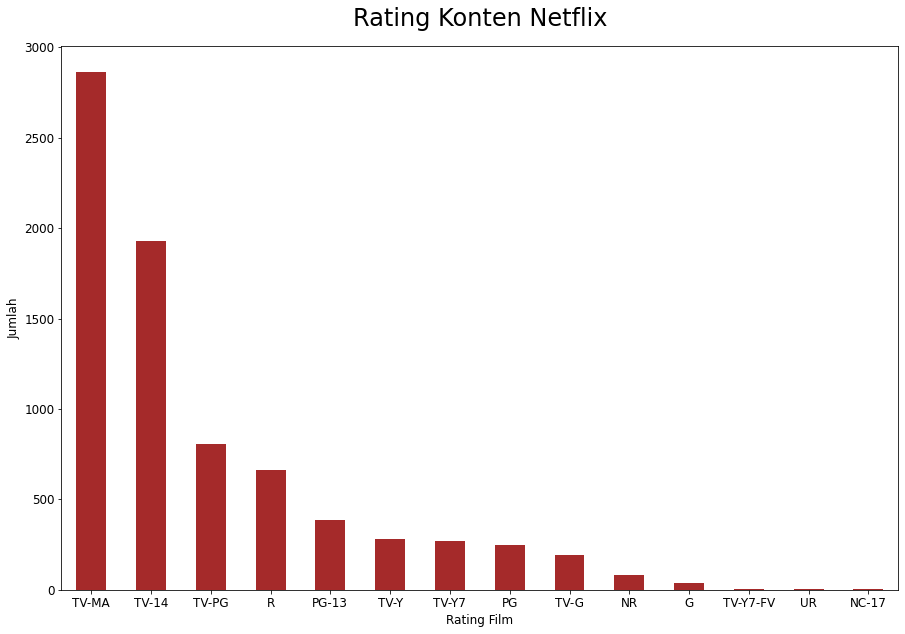

In [19]:
plt.figure(1, figsize=(15,10))
data_year = df.groupby(['rating'])['title'].count().sort_values(ascending=False).plot(kind='bar', color='brown')
plt.title('Rating Konten Netflix',pad=20, fontsize=24)
plt.xlabel('Rating Film', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.ylim(ymin=0)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##**Negara Pembuat Konten di Netflix**

In [13]:
country = df['country'].value_counts().sort_values(ascending=False)[0:10]
country_df = pd.DataFrame(country)
country_df

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101
Turkey,100


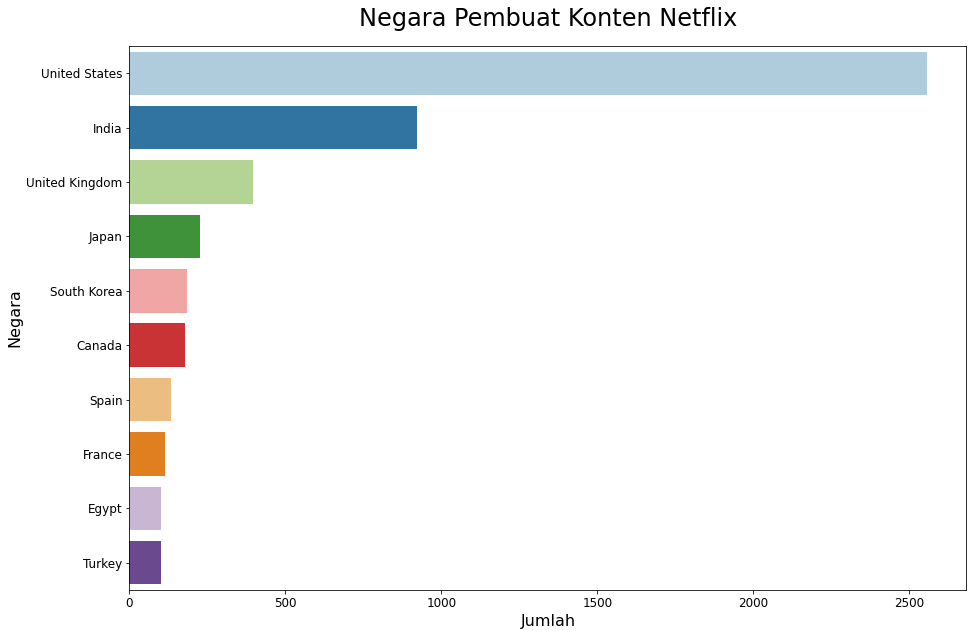

In [14]:
plt.figure(figsize=(15,10))

sns.countplot(y='country', data=df, palette='Paired', order=df['country'].value_counts().index[0:10])
plt.title('Negara Pembuat Konten Netflix', pad=20, fontsize=24)
plt.xlabel ('Jumlah', fontsize=16)
plt.ylabel ('Negara', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##**Durasi Konten Netflix**

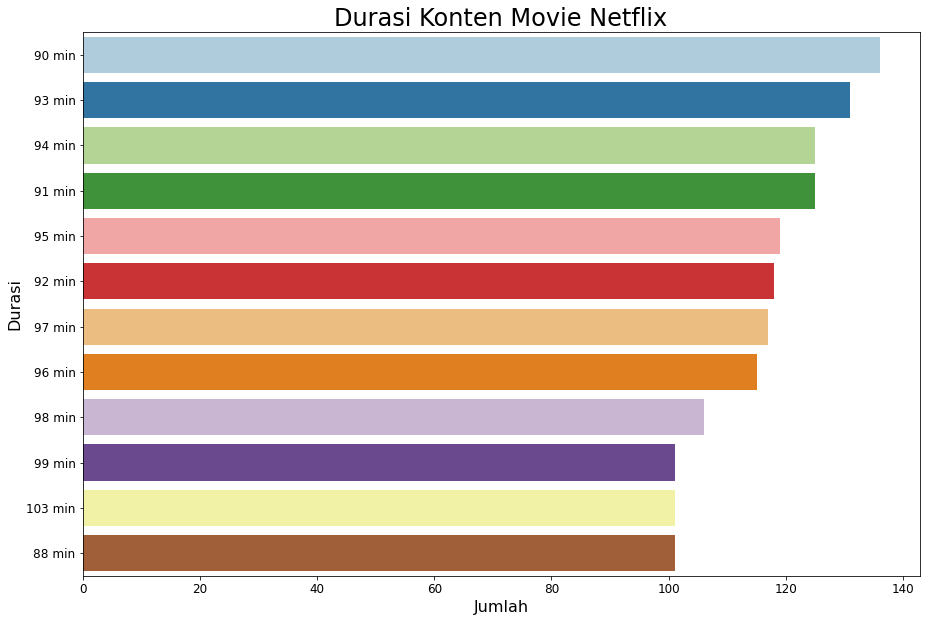

In [18]:
plt.figure(figsize=(15,10))

sns.countplot(y='duration', data=df, palette='Paired', order=df['duration'].value_counts().index[3:15])
plt.title('Durasi Konten Movie Netflix', fontsize=24)
plt.xlabel ('Jumlah', fontsize=16)
plt.ylabel ('Durasi', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()